# Web Scraping 📡

[timeanddate.com](https://www.timeanddate.com/holidays/us/) tracks a much more diverse collection of holidays that the Public Holidays API. 

## Your Task

Using the url for the linked website above, create a function called `timeanddate` that returns the table of holiday data for a given year. This function should have one argument: `year`.

The output dataframe should have three columns
1. date
    - datatype: `datetime64[ns]`
2. holiday_name
    - datatype: `object`
3. type
    - datatype: `object`

*Hint: Take note how to the url changes when you select different years!*


Import the `stocks` function from the `src/` folder, and merge the holidays data with 2017 stocks.

Produce a bar chart showing the count for each holiday type. 

In [20]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

def timeanddate(year):
    # Make request to website
    req = requests.get(f'https://www.timeanddate.com/holidays/us/{year}')

    # Parse html
    soup = BeautifulSoup(req.text, 'html')

    # Turn <table> div into dataframe
    df = pd.read_html(str(soup.find('table')))[0]
    df.columns = df.columns.droplevel(0)

    # Drop Day of week column
    df.drop('Unnamed: 1_level_1', axis=1, inplace=True)
    # Function for cleaning column names
    column_format = lambda x: x.lower().strip().replace(' ', '_')
    # Clean function names
    df.columns = [column_format(x) for x in df.columns]
    # Change `name` column to `holiday_name` for merging
    df.rename({'name': 'holiday_name'}, axis=1, inplace=True)
    # Drop last row in webscraped table because it's not needed
    df.drop(df.index[-1], inplace=True)
    # Reformat date data so it can be changed to datetime
    df.date = df.date + f', {year}'
    # Change to datetime
    df.date = pd.to_datetime(df.date)
    # Drop details column. It is mostly null.
    df.drop('details', axis=1, inplace=True)
    return df

In [6]:
import sys
sys.path.append("..")
from src.data_collection import stocks
df = stocks(2017)
web = timeanddate(2017)

In [11]:
df = df.merge(web, on='date', how='left').drop_duplicates(subset=['date', 'name'])

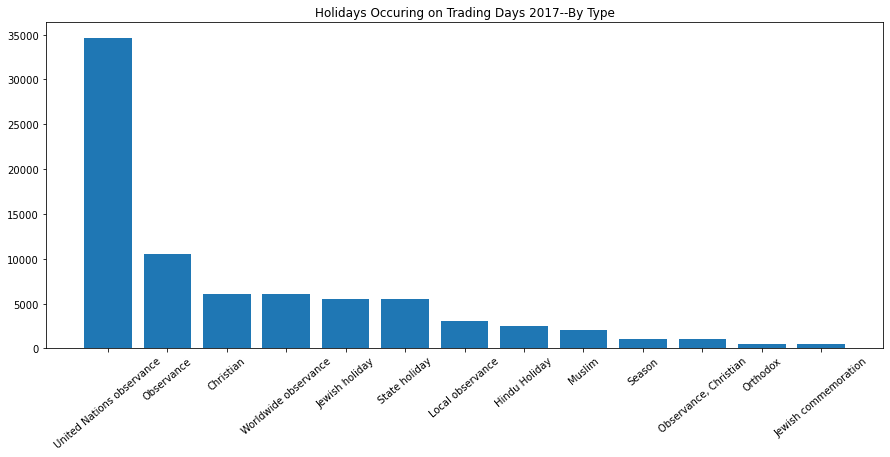

In [27]:
series = df.type.value_counts()
plt.figure(figsize=(15,6))
plt.bar(series.index, series.values)
plt.xticks(rotation=40)
plt.title('Holidays Occuring on Trading Days 2017--By Type')
plt.show()